In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analyze of MIMIC-III data to analyze the Cardio-Vascular Disease (CVD)

In [2]:
# Loading the data
cvd_dataset = pd.read_csv("Datasets\Raw\CVD_Vital_SIgns.csv")
cvd_dataset.head()

,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
0,94297,200697.0,93.0,94.0,98.0,39.0,36.0,1
1,94229,219381.0,97.0,96.0,98.0,16.0,36.5,0
2,94195,276193.0,82.0,96.0,97.0,25.0,36.3,1
3,94256,241577.0,98.0,196.0,96.0,16.0,36.5,1
4,93996,236789.0,98.0,92.0,99.0,28.0,37.2,1


In [3]:
cvd_dataset.columns

Index(['subject_id', 'icustay_id', 'heart_rate', 'blood_pressure',
       'oxygen_saturation', 'respiratory_rate', 'temperature', 'Label'],
      dtype='object')

In [4]:
cvd_dataset.drop(['subject_id','icustay_id','blood_pressure'],axis=1,inplace=True)

In [5]:
cvd_dataset

,heart_rate,oxygen_saturation,respiratory_rate,temperature,Label
0,93.0,98.0,39.0,36.0,1
1,97.0,98.0,16.0,36.5,0
2,82.0,97.0,25.0,36.3,1
3,98.0,96.0,16.0,36.5,1
4,98.0,99.0,28.0,37.2,1
...,...,...,...,...,...
23463,98.0,97.0,34.0,37.5,1
23464,70.0,96.0,25.0,37.2,1
23465,86.0,97.0,27.0,36.9,1
23466,76.0,99.0,20.0,36.2,1


## Basic Information

In [6]:
cvd_dataset['Label'].value_counts()

Label
1    17534
0     5934
Name: count, dtype: int64

In [7]:
cvd_dataset.isna().sum()

heart_rate           0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64

In [8]:
cvd_dataset.duplicated().sum()

8422

In [9]:
# Removing the duplicates of the dataset
cvd_dataset.drop_duplicates(inplace=True)

In [10]:
cvd_dataset['Label'].value_counts()

Label
1    12781
0     2265
Name: count, dtype: int64

In [11]:
print("\nSummary Statistics:\n", cvd_dataset.describe())



Summary Statistics:
          heart_rate  oxygen_saturation  respiratory_rate   temperature  \
count  1.504600e+04       15046.000000      15046.000000  15046.000000   
mean   7.562481e+02          97.655743         26.035691     38.305266   
std    8.152400e+04          78.548739         12.746864      8.528992   
min    7.000000e+00           9.000000          2.000000     -3.000000   
25%    8.800000e+01          96.000000         18.000000     36.800000   
50%    9.300000e+01          97.000000         25.000000     37.200000   
75%    9.700000e+01          98.000000         32.000000     37.800000   
max    9.999999e+06        9560.000000        914.000000    101.300000   

              Label  
count  15046.000000  
mean       0.849462  
std        0.357610  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


## Data Vizualization

### Data Histograms

Text(0.5, 1.0, 'Oxygen Saturation Distribution')

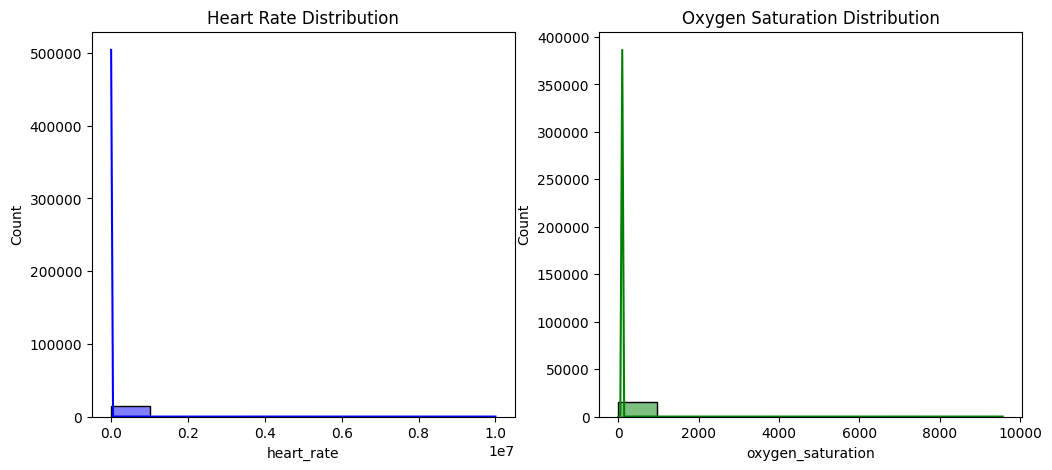

In [12]:
# Visualizing Distributions
plt.figure(figsize=(12, 5))

# Histogram for Vizualize data
plt.subplot(1, 2, 1)
sns.histplot(cvd_dataset["heart_rate"], bins=10, kde=True, color='blue')
plt.title("Heart Rate Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cvd_dataset["oxygen_saturation"], bins=10, kde=True, color='green')
plt.title("Oxygen Saturation Distribution")

##### As you can see as the boxplot distribution there is a huge amount of outliers in this dataset.

### Detecting Outliers

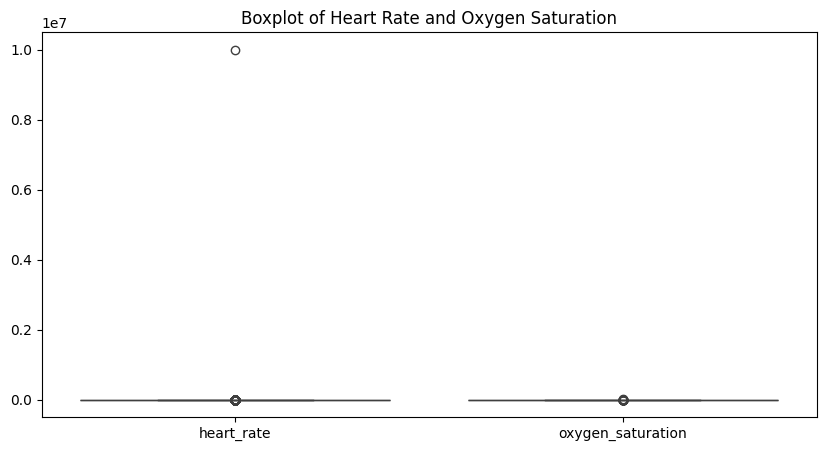

In [13]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=cvd_dataset[['heart_rate', 'oxygen_saturation']])
plt.title("Boxplot of Heart Rate and Oxygen Saturation")
plt.show()

### Removing the Outliers

In [14]:
# Inter-quantile range calculation for each feature
Q1_heart_rate = cvd_dataset['heart_rate'].quantile(0.25)
Q3_heart_rate = cvd_dataset['heart_rate'].quantile(0.75)
IQR_heart_rate = Q3_heart_rate - Q1_heart_rate

Q1_oxygen_saturation = cvd_dataset['oxygen_saturation'].quantile(0.25)
Q3_oxygen_saturation = cvd_dataset['oxygen_saturation'].quantile(0.75)
IQR_oxygen_saturation = Q3_oxygen_saturation - Q1_oxygen_saturation

# Determine the bounds for outliers
lower_bound_heart_rate = Q1_heart_rate - 1.5 * IQR_heart_rate
upper_bound_heart_rate = Q3_heart_rate + 1.5 * IQR_heart_rate

lower_bound_oxygen_saturation = Q1_oxygen_saturation - 1.5 * IQR_oxygen_saturation
upper_bound_oxygen_saturation = Q3_oxygen_saturation + 1.5 * IQR_oxygen_saturation

# Filter out rows with outliers
cvd_dataset = cvd_dataset[
    (cvd_dataset['heart_rate'] >= lower_bound_heart_rate) &
    (cvd_dataset['heart_rate'] <= upper_bound_heart_rate) &
    (cvd_dataset['oxygen_saturation'] >= lower_bound_oxygen_saturation) &
    (cvd_dataset['oxygen_saturation'] <= upper_bound_oxygen_saturation)
]


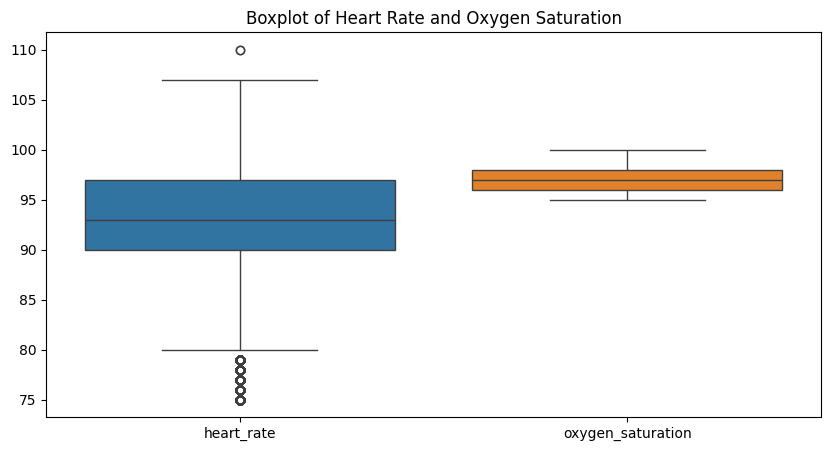

In [15]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=cvd_dataset[['heart_rate', 'oxygen_saturation']])
plt.title("Boxplot of Heart Rate and Oxygen Saturation")
plt.show()

Text(0.5, 1.0, 'Oxygen Saturation Distribution')

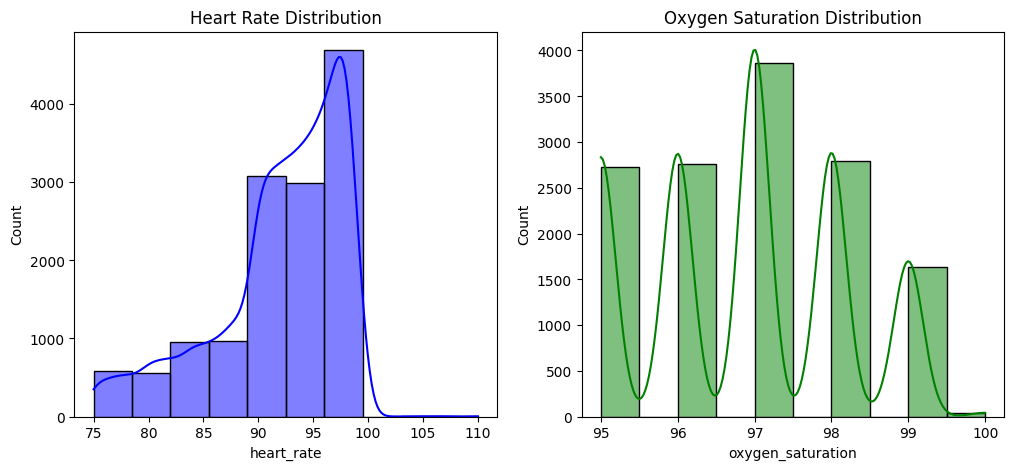

In [16]:
# Visualizing Distributions
plt.figure(figsize=(12, 5))

# Histogram for Vizualize data
plt.subplot(1, 2, 1)
sns.histplot(cvd_dataset["heart_rate"], bins=10, kde=True, color='blue')
plt.title("Heart Rate Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cvd_dataset["oxygen_saturation"], bins=10, kde=True, color='green')
plt.title("Oxygen Saturation Distribution")

### Correlation Matrix

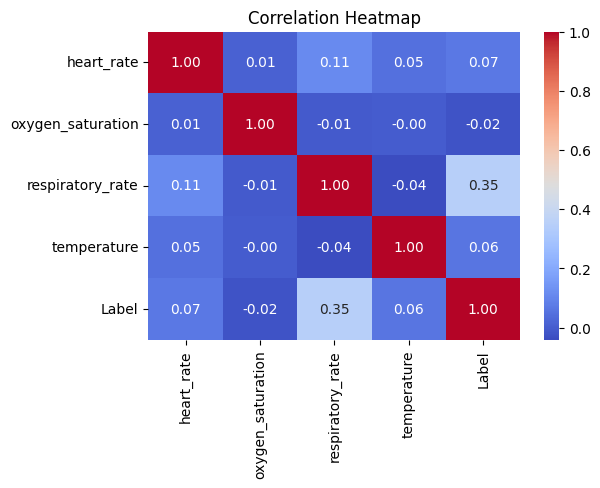

In [17]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cvd_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Pair Plot

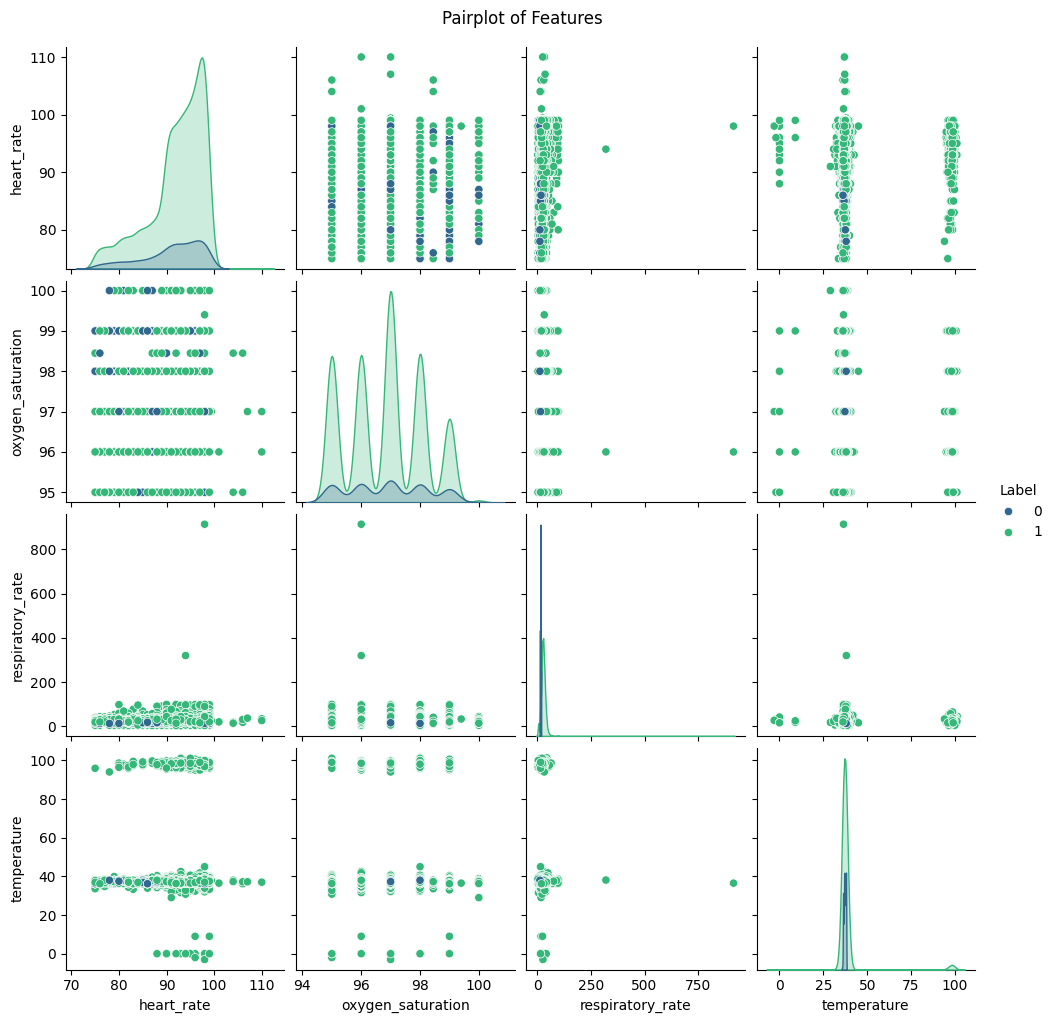

In [18]:
# Pairplot (good for visualizing relationships between features)
sns.pairplot(cvd_dataset, hue='Label', palette='viridis')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


### Histograms for the Features

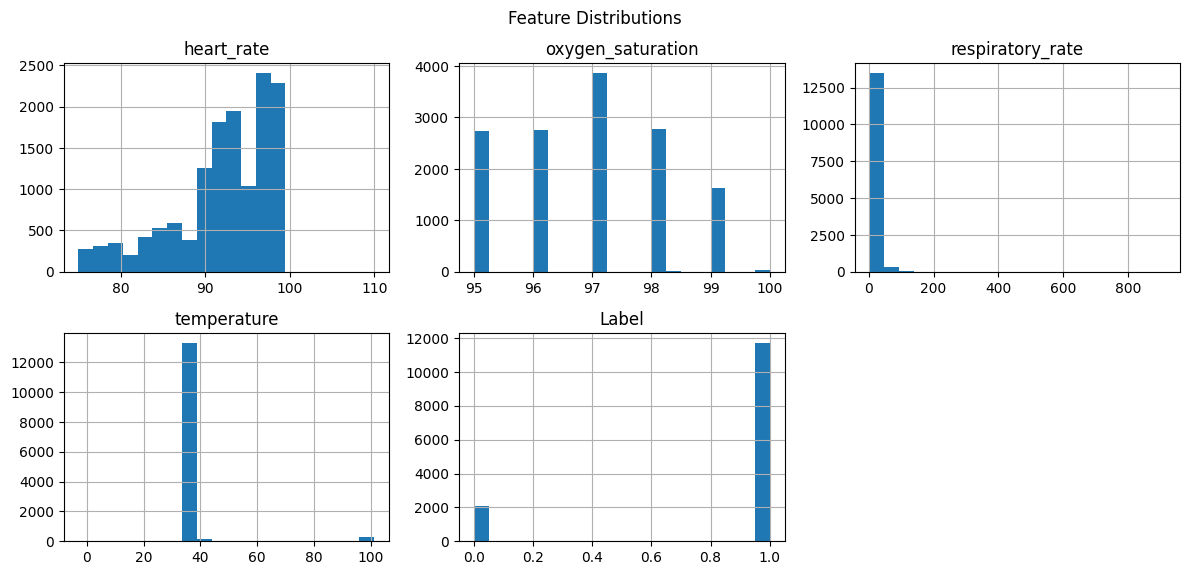

In [19]:
# Histograms for distributions
cvd_dataset.hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

### Violin Plot for the features

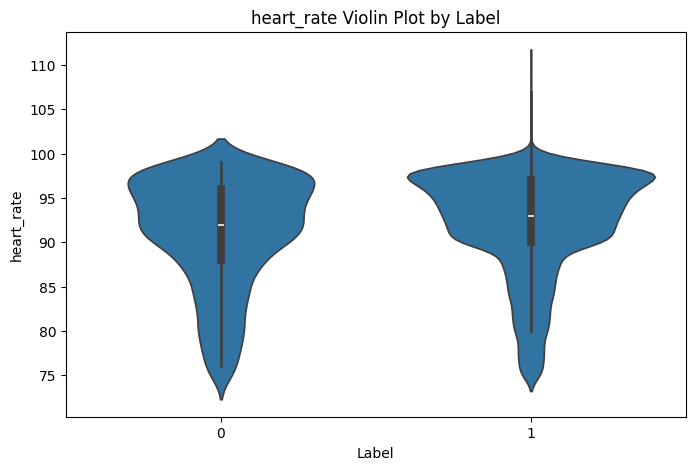

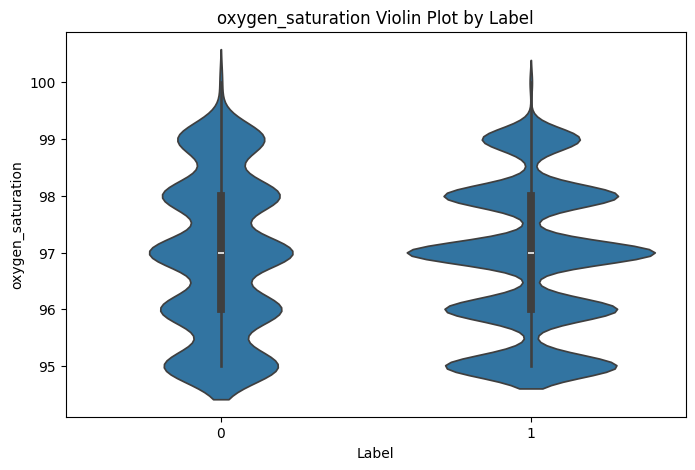

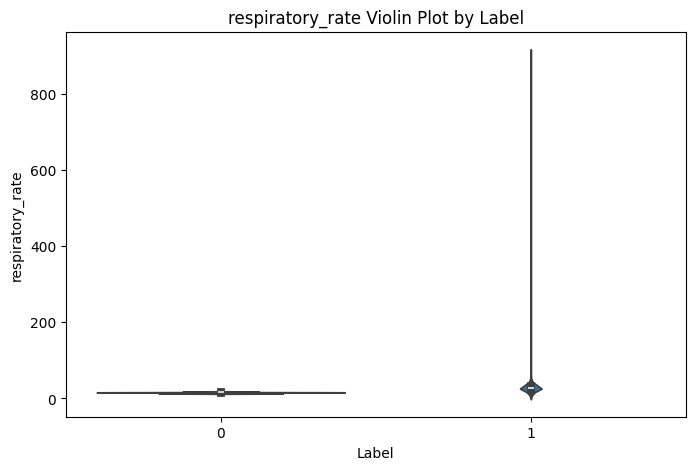

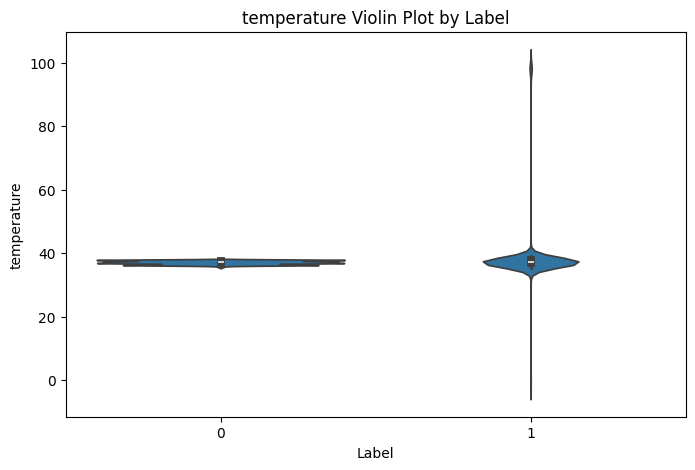

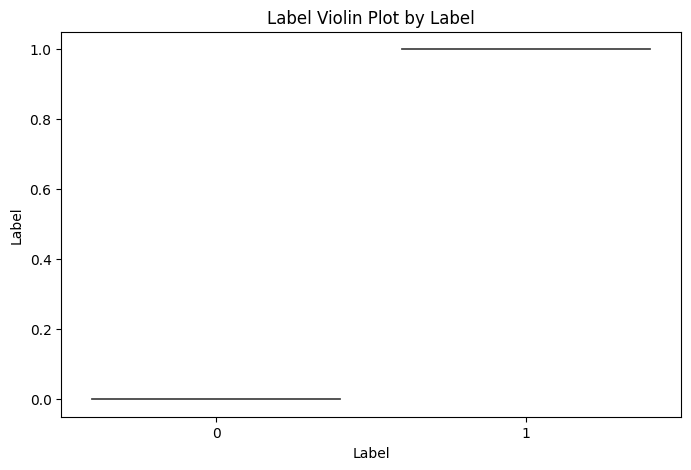

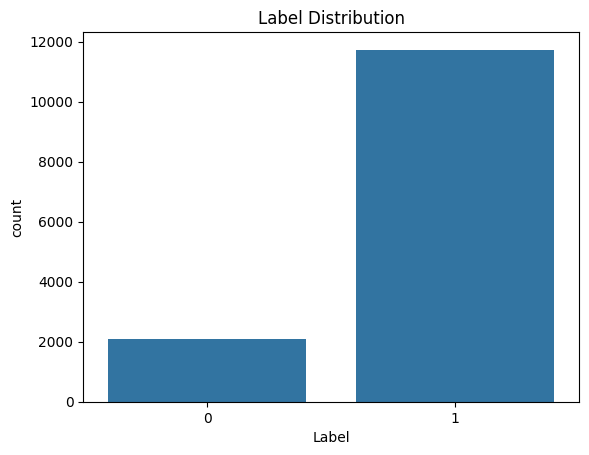

In [20]:
# Violin plots
for col in cvd_dataset.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Label', y=col, data=cvd_dataset, inner='box')
    plt.title(f'{col} Violin Plot by Label')
    plt.show()

# Countplot for class balance
sns.countplot(x='Label', data=cvd_dataset)
plt.title("Label Distribution")
plt.show()

### Class Imbalance Handling

##### As u can see there is lot of class imbalance that can lead to wrong predictions. Therefore let's fix those.

In [22]:
cvd_dataset['Label'].value_counts()

Label
1    11731
0     2089
Name: count, dtype: int64

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train is a 1D array of your training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Gives weights like: [2.81, 0.5] for classes 0 and 1
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)


##### These data are ready to feed into a ML model. As there aren't do much of pre-processing (no outliers, missing values)

In [21]:
# Saving the data to Analyzed file
cvd_dataset.to_csv("Datasets/Analyzed/Analyzed_CVD_Prediction.csv",index=False)